In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def _resample(data, fs_old, fs_new):
    """Resample data array.
    
    Parameters
    ----------
    data : (N, D) numpy array
        An (N, D) numpy array with N time steps across D dimensions.
    fs_old, fs_new : int, float
        Sampling frequenqy (in Hz) before and after resampling, respectively.
    
    Returns
    -------
    data_out : (M, D) numpy array
        A (M, D) numpy array with M time steps across D dimensions.
    """
    from scipy.interpolate import interp1d

    # 
    try:
        n_time_steps, n_channels = data.shape
    except:
        data = data.reshape(-1, 1)
        n_time_steps, n_channels = data.shape
        
    # Original time steps
    t_old = np.arange(n_time_steps)/fs_old

    # Total number after time steps after resampling
    M = int(t_old[-1]/(1/fs_new))+1
    t_new = np.arange(M)/fs_new
    
    # Allocate memory for output variable
    data_out = np.zeros((M, n_channels))

    # For each dimensions
    for ix_chan in range(n_channels):

        # Get interpolation function
        f = interp1d(t_old, data[:,ix_chan])

        # Fit new data points to function
        data_out[:,ix_chan] = f(t_new)
    return data_out

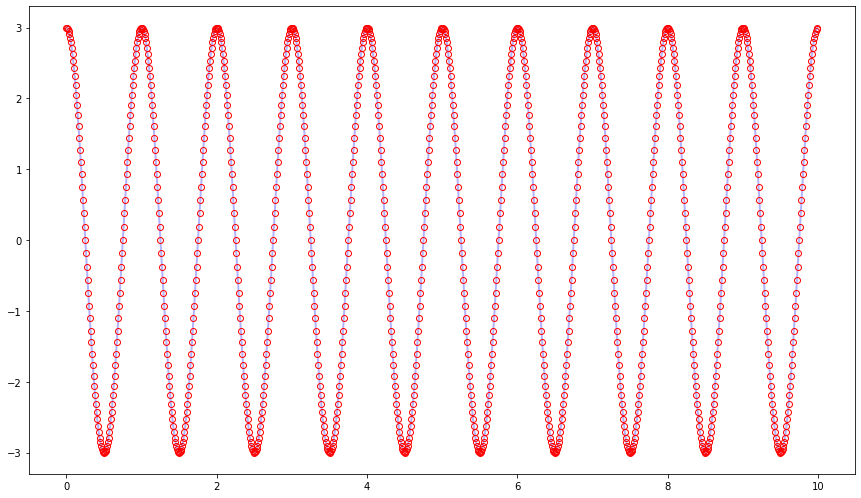

In [54]:
N = 1000  # number of time steps
fs=  100  # sampling frequency (in Hz)
t = np.arange(N)/fs  # time (in s)
x1= 3 * np.cos(2*np.pi*1*t)

fs_new = 100
y1 = _resample(x1, fs, fs_new)

fig, ax = plt.subplots(1, 1, figsize=(14.8, 8.6))
ax.plot(t, x1, '-', c=(0, 0, 1, 0.3), lw=2)
ax.plot(np.arange(y1.shape[0])/fs_new, y1, 'o', mfc='none', mec=(1, 0, 0), ms=6)
plt.show()


In [56]:
x1[:10], y1[:10]

(array([3.        , 2.99408019, 2.9763441 , 2.94686175, 2.90574948,
        2.85316955, 2.78932946, 2.71448116, 2.62892004, 2.53298378]),
 array([[3.        ],
        [2.99408019],
        [2.9763441 ],
        [2.94686175],
        [2.90574948],
        [2.85316955],
        [2.78932946],
        [2.71448116],
        [2.62892004],
        [2.53298378]]))

In [11]:
t_new = np.arange(M)/fs_new

In [12]:
t_new[:3], t_new[-3:]

(array([0.   , 0.005, 0.01 ]), array([9.98 , 9.985, 9.99 ]))